<a href="https://colab.research.google.com/github/mharshavardhan224/DataAnalyst/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data = pd.read_csv('/content/covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,22-01-2020,0,0,0,0,Africa


In [ ]:
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/covid_19_clean_complete.csv')

# Find the missing values in each column
missing_values = data.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(data)) * 100
missing_percentage

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


,0
Province/State,70.114943
Country/Region,0.000000
Lat,0.000000
Long,0.000000
Date,0.000000
Confirmed,0.000000
Deaths,0.000000
Recovered,0.000000
Active,0.000000
WHO Region,0.000000


# Remove duplicate entries

In [ ]:
# prompt: generate a code Remove duplicate entries
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/covid_19_clean_complete.csv') #This line ensures that the dataframe is loaded in the current cell's scope

# Drop duplicate rows based on all columns
data = data.drop_duplicates()

# Print the number of rows after removing duplicates
print(len(data))

49068


Convert date columns to proper datetime format.

In [ ]:
# prompt: generate a code to Convert date columns to proper datetime format.

import pandas as pd
# Convert date columns to proper datetime format.
data['Date'] = pd.to_datetime(data['Date'])
data.head()


<ipython-input-5-e2faf3392467>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Confirmed cases, recoveries, and deaths?

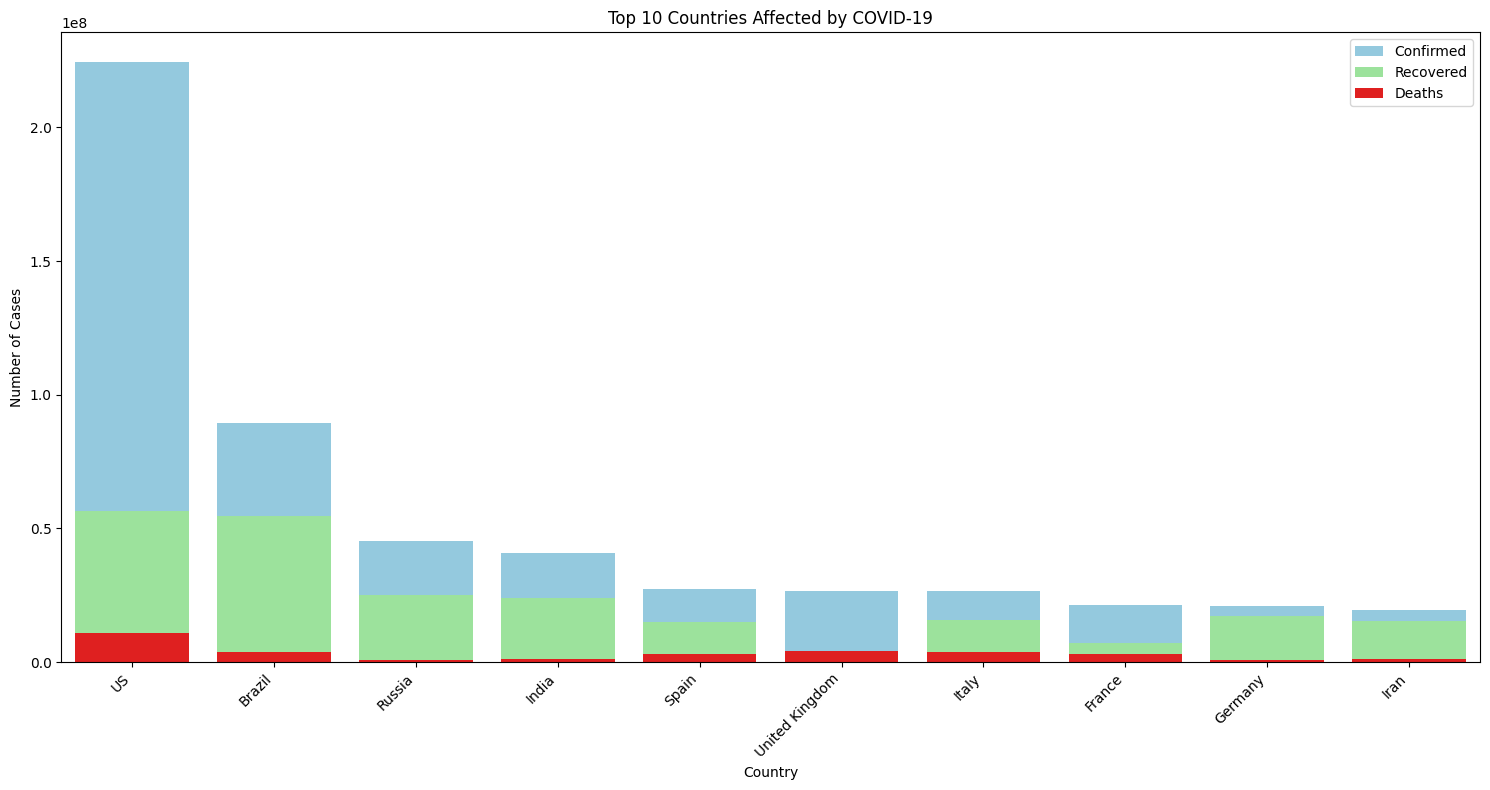

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by country and calculate the sum of confirmed cases, recoveries, and deaths
country_data = data.groupby('Country/Region').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'}).reset_index()

# Sort the data by confirmed cases in descending order to show the top countries
country_data = country_data.sort_values(by='Confirmed', ascending=False)

# Select the top N countries for visualization (e.g., top 10)
top_n_countries = 10
top_countries_data = country_data.head(top_n_countries)

# Create a bar plot to visualize the data
plt.figure(figsize=(15, 8))
sns.barplot(x='Country/Region', y='Confirmed', data=top_countries_data, label='Confirmed', color='skyblue')
sns.barplot(x='Country/Region', y='Recovered', data=top_countries_data, label='Recovered', color='lightgreen')
sns.barplot(x='Country/Region', y='Deaths', data=top_countries_data, label='Deaths', color='red')

plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.title(f'Top {top_n_countries} Countries Affected by COVID-19')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# lockdown measures correlate with case reductions

<ipython-input-7-a2640390fd4d>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-7-a2640390fd4d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lockdown_period_data['Daily_Change'] = lockdown_period_data['Confirmed'].diff()


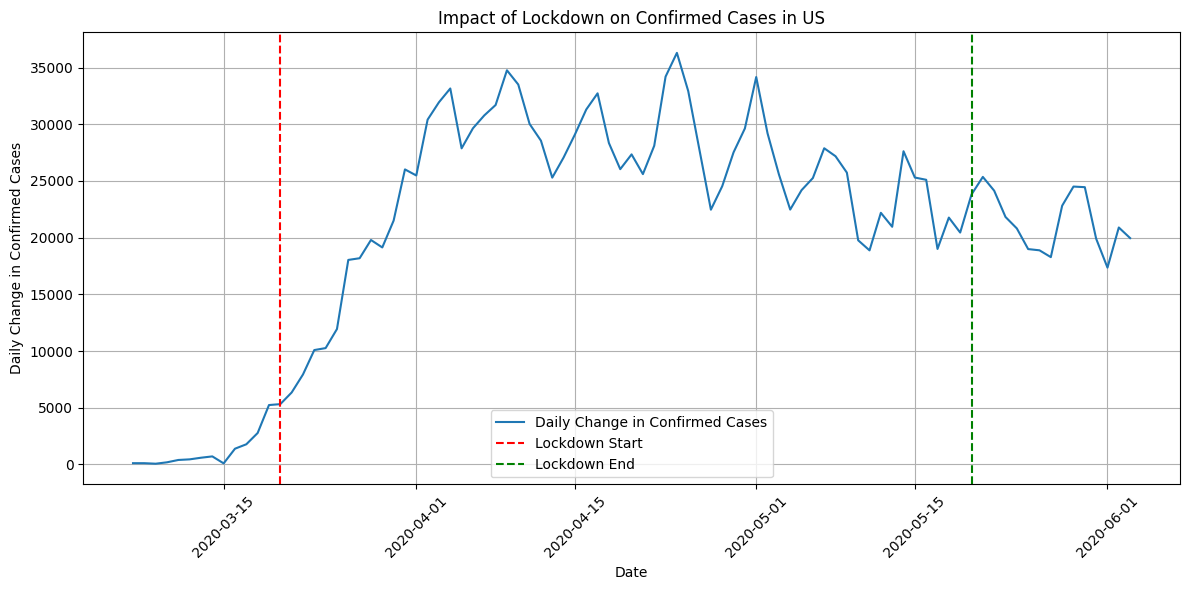

In [ ]:
# prompt: generate a code How did lockdown measures correlate with case reductions?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/covid_19_clean_complete.csv')

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Group data by country and date, sum confirmed cases
grouped_data = data.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()

# Example: Analyze lockdown impact for a specific country (e.g., 'US')
country = 'US'
country_data = grouped_data[grouped_data['Country/Region'] == country]

# Placeholder for lockdown dates (replace with actual lockdown start and end dates)
lockdown_start = pd.to_datetime('2020-03-20')
lockdown_end = pd.to_datetime('2020-05-20')

# Filter data for the period around the lockdown
lockdown_period_data = country_data[
    (country_data['Date'] >= lockdown_start - pd.Timedelta(days=14)) &  # 2 weeks before
    (country_data['Date'] <= lockdown_end + pd.Timedelta(days=14))   # 2 weeks after
]

# Calculate the daily change in confirmed cases
lockdown_period_data['Daily_Change'] = lockdown_period_data['Confirmed'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lockdown_period_data['Date'], lockdown_period_data['Daily_Change'], label='Daily Change in Confirmed Cases')
plt.axvline(x=lockdown_start, color='red', linestyle='--', label='Lockdown Start')
plt.axvline(x=lockdown_end, color='green', linestyle='--', label='Lockdown End')

plt.xlabel('Date')
plt.ylabel('Daily Change in Confirmed Cases')
plt.title(f'Impact of Lockdown on Confirmed Cases in {country}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#More robust analysis would involve statistical tests (e.g., t-tests) to compare case changes before and after the lockdown.
#You would also need accurate lockdown start/end dates for each country/region.


# Summarize key statistics (total cases, deaths, recoveries per country)

In [ ]:
# prompt: generate a code to Summarize key statistics (total cases, deaths, recoveries per country).

import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/covid_19_clean_complete.csv') #This line ensures that the dataframe is loaded in the current cell's scope

# Group data by country and calculate the sum of confirmed cases, recoveries, and deaths
country_data = data.groupby('Country/Region').agg({'Confirmed': 'sum', 'Recovered': 'sum', 'Deaths': 'sum'}).reset_index()

# Sort the data by confirmed cases in descending order to show the top countries
country_data = country_data.sort_values(by='Confirmed', ascending=False)

def summarize_statistics(country_data):
    """
    Summarizes key statistics (total cases, deaths, recoveries) per country.

    Args:
        country_data (pd.DataFrame): DataFrame containing country-wise statistics.

    Returns:
        pd.DataFrame: DataFrame with summarized statistics.
    """

    summary = country_data[['Country/Region', 'Confirmed', 'Recovered', 'Deaths']].copy()
    summary.rename(columns={
        'Confirmed': 'Total Cases',
        'Recovered': 'Total Recoveries',
        'Deaths': 'Total Deaths'
    }, inplace=True)

    return summary

# Example usage:
summary_df = summarize_statistics(country_data)
summary_df

,Country/Region,Total Cases,Total Recoveries,Total Deaths
173,US,224345948,56353416,11011411
23,Brazil,89524967,54492873,3938034
138,Russia,45408411,25120448,619385
79,India,40883464,23783720,1111831
157,Spain,27404045,15093583,3033030
...,...,...,...,...
140,Saint Kitts and Nevis,1772,1295,0
68,Greenland,1507,1372,0
75,Holy See,1356,742,0
130,Papua New Guinea,1185,695,2


# 5 worst-affected countries based on total cases and deaths.

In [ ]:
# prompt: generate a code to Find the top 5 worst-affected countries based on total cases and deaths.

# Assuming 'country_data' DataFrame is already created as in the provided code

# Sort by total deaths in descending order to find the worst-affected countries
worst_affected_countries = country_data.sort_values(by=['Deaths', 'Confirmed'], ascending=False).head(5)

print(worst_affected_countries[['Country/Region', 'Confirmed', 'Deaths']])


     Country/Region  Confirmed    Deaths
173              US  224345948  11011411
177  United Kingdom   26748587   3997775
23           Brazil   89524967   3938034
85            Italy   26745145   3707717
61           France   21210926   3048524


      Province/State  Active
54            Quebec   53061
30             Hubei   50633
51           Ontario   37866
0            Alberta   10204
72          Victoria    5149
7   British Columbia    3307
15     French Guiana    3088
45   New South Wales    2868
29         Hong Kong    1270
28             Henan    1254


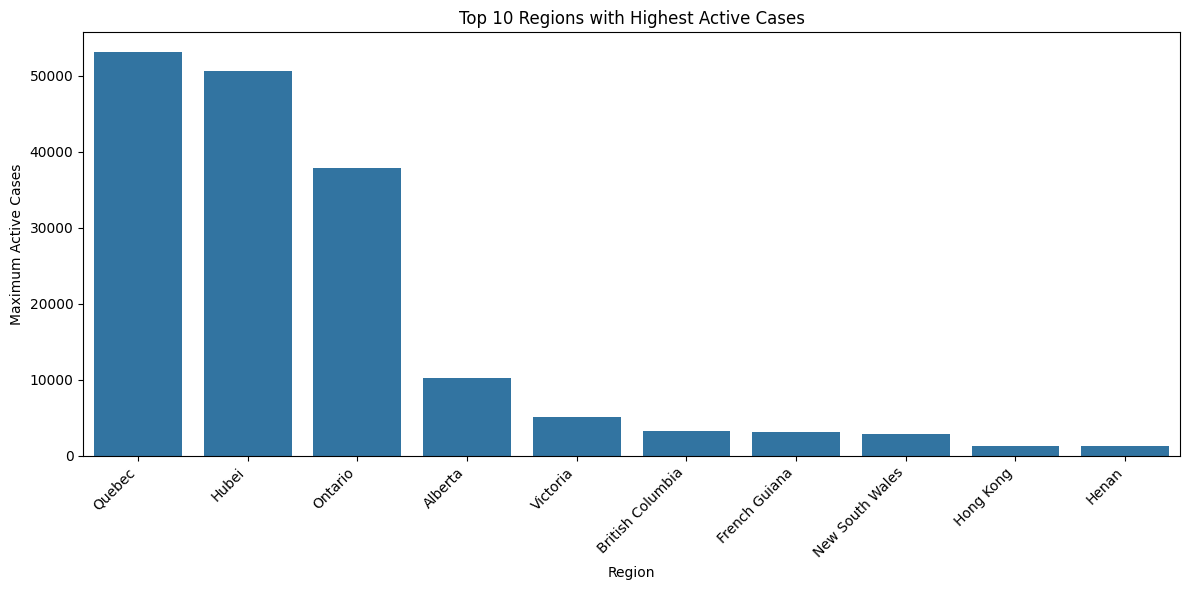

In [ ]:
# prompt: generate a code to Which regions have the highest active cases? show in graphs and write  about the any few points about this chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

# Group data by region and find the latest date for each region
latest_data = data.groupby('Province/State')['Date'].max().reset_index()

# Merge the latest dates with the original data to get the latest active cases for each region
merged_data = pd.merge(latest_data, data, on=['Province/State', 'Date'], how='left')

# Group by region and sum the active cases
active_cases_by_region = merged_data.groupby('Province/State')['Active'].sum().reset_index()

# Sort the regions by active cases in descending order
active_cases_by_region = active_cases_by_region.sort_values(by='Active', ascending=False)

# Select the top N regions for visualization
top_n_regions = 10
top_regions_data = active_cases_by_region.head(top_n_regions)


# Create a bar plot to show active cases by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Province/State', y='Active', data=top_regions_data, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Active Cases')
plt.title(f'Top {top_n_regions} Regions with Highest Active COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analysis of the chart:
# This bar chart displays the top 10 regions with the highest number of active COVID-19 cases.
# It provides a visual comparison of the severity of the pandemic across different regions.
#  Points to note:
# 1. Identify the regions with the highest active caseloads.
# 2. Compare the relative differences in active cases among the top regions.
# 3. Observe any potential trends or patterns.
# 4. Analyze potential reasons for the variations in active cases among these regions.  Further investigation may include factors like population density, testing rates, and implemented health measures.




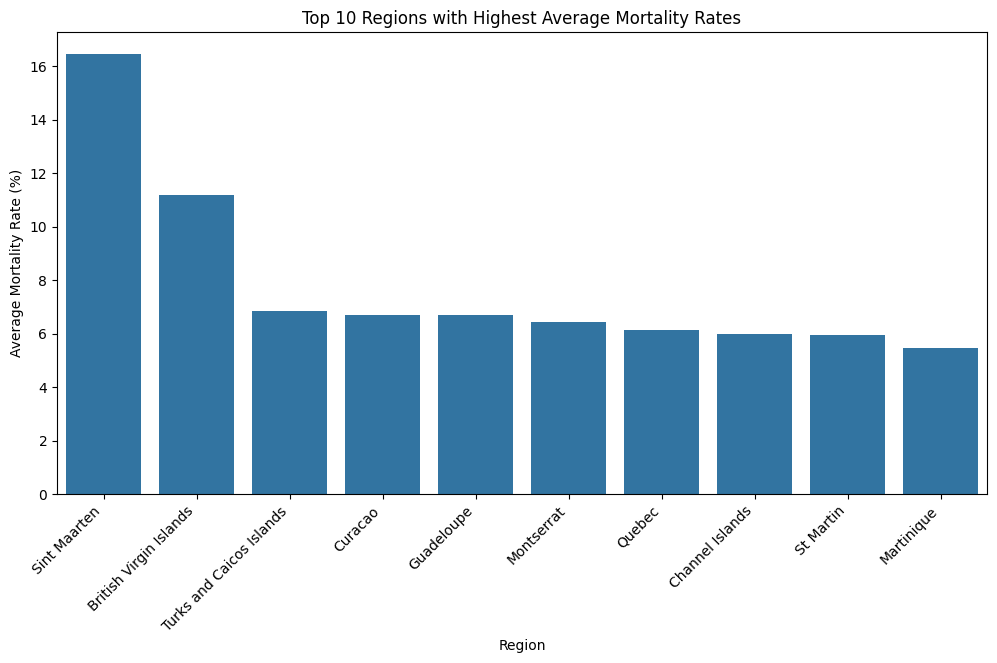

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Colab
%matplotlib inline

# Load dataset (modify the path as needed)
# data = pd.read_csv('/content/covid_19_clean_complete.csv')

# Ensure there are no zero or missing values in 'Confirmed' to avoid division errors
data = data[(data['Confirmed'] > 0) & (data['Deaths'] >= 0)].copy()

# Calculate Mortality Rate
if 'Mortality_Rate' not in data.columns:
    data['Mortality_Rate'] = (data['Deaths'] / data['Confirmed']) * 100

# Group data by region and calculate the average mortality rate
region_mortality = data.groupby('Province/State', as_index=False)['Mortality_Rate'].mean()

# Sort by mortality rate in descending order
region_mortality = region_mortality.sort_values('Mortality_Rate', ascending=False)

# Plot the top 10 regions with the highest mortality rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Province/State', y='Mortality_Rate', data=region_mortality.head(10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Top 10 Regions with Highest Average Mortality Rates')

# Save and display the plot
plt.savefig('mortality_rate.png')  # Save to avoid rendering issues
plt.show()


      Province/State   Active
72           Unknown  2816444
54            Quebec    53061
30             Hubei    50633
51           Ontario    37866
0            Alberta    10204
73          Victoria     5149
7   British Columbia     3307
15     French Guiana     3088
45   New South Wales     2868
29         Hong Kong     1270


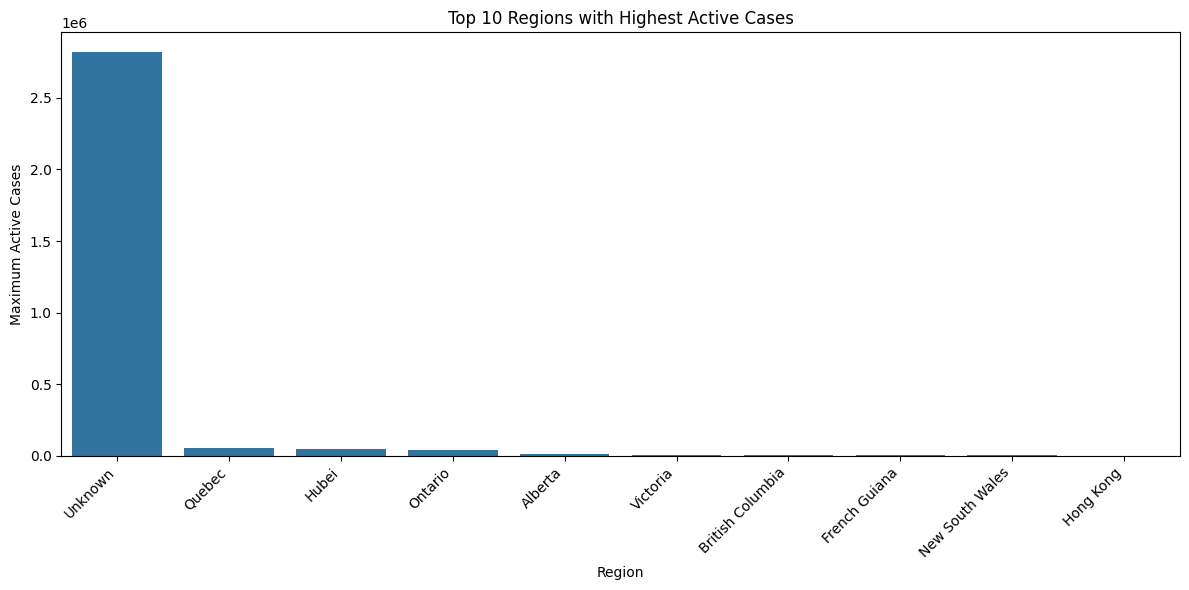

In [ ]:
# prompt: generate a code to Identify high-risk areas based on data and show in Bar Chart write  about the any few points about this chart

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded and processed as in your previous code

# Group data by region and get the maximum active cases
if 'Active' not in data.columns:
    data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

region_active_cases = data.groupby('Province/State')['Active'].max().reset_index()
region_active_cases = region_active_cases.sort_values('Active', ascending=False)

# Display the top regions with the highest active cases
print(region_active_cases.head(10))  # Display the top 10, adjust as needed


# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Province/State', y='Active', data=region_active_cases.head(10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Maximum Active Cases')
plt.title('Top 10 Regions with Highest Active Cases')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: generate a code to remove the  Unknown  2816444

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ... (rest of your existing code)


# Assuming 'data' DataFrame is already loaded

# Remove rows where 'Province/State' is 'Unknown'
data = data[data['Province/State'] != 'Unknown']

      Province/State  Active
54            Quebec   53061
30             Hubei   50633
51           Ontario   37866
0            Alberta   10204
72          Victoria    5149
7   British Columbia    3307
15     French Guiana    3088
45   New South Wales    2868
29         Hong Kong    1270
28             Henan    1254


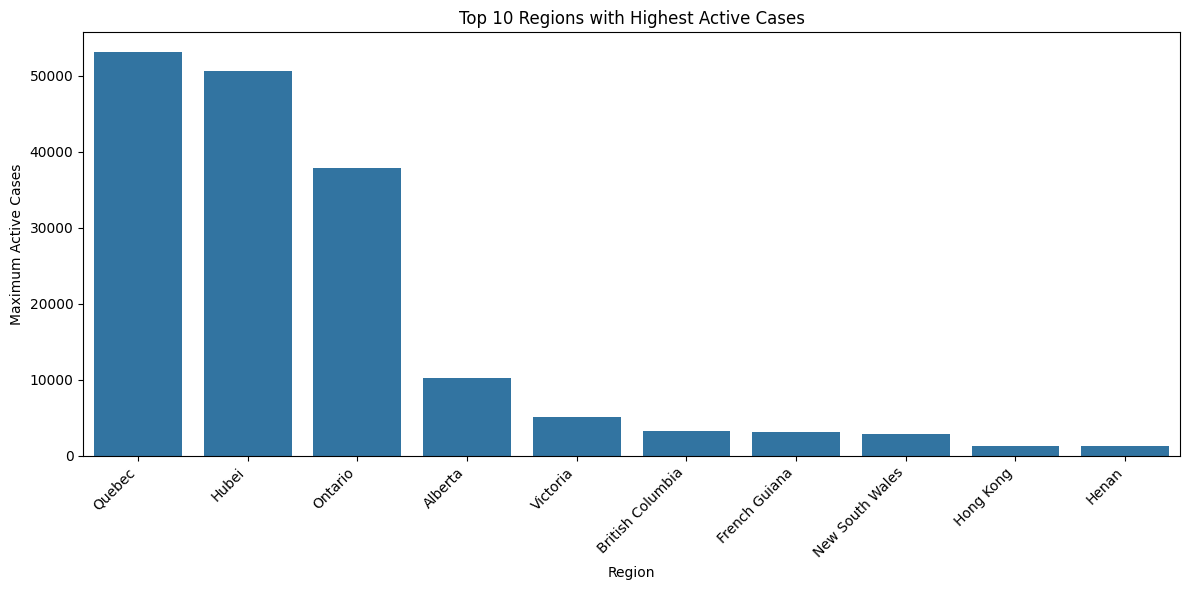

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded and processed as in your previous code

# Group data by region and get the maximum active cases
if 'Active' not in data.columns:
    data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

region_active_cases = data.groupby('Province/State')['Active'].max().reset_index()
region_active_cases = region_active_cases.sort_values('Active', ascending=False)

# Display the top regions with the highest active cases
print(region_active_cases.head(10))  # Display the top 10, adjust as needed


# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Province/State', y='Active', data=region_active_cases.head(10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Maximum Active Cases')
plt.title('Top 10 Regions with Highest Active Cases')
plt.tight_layout()
plt.show()


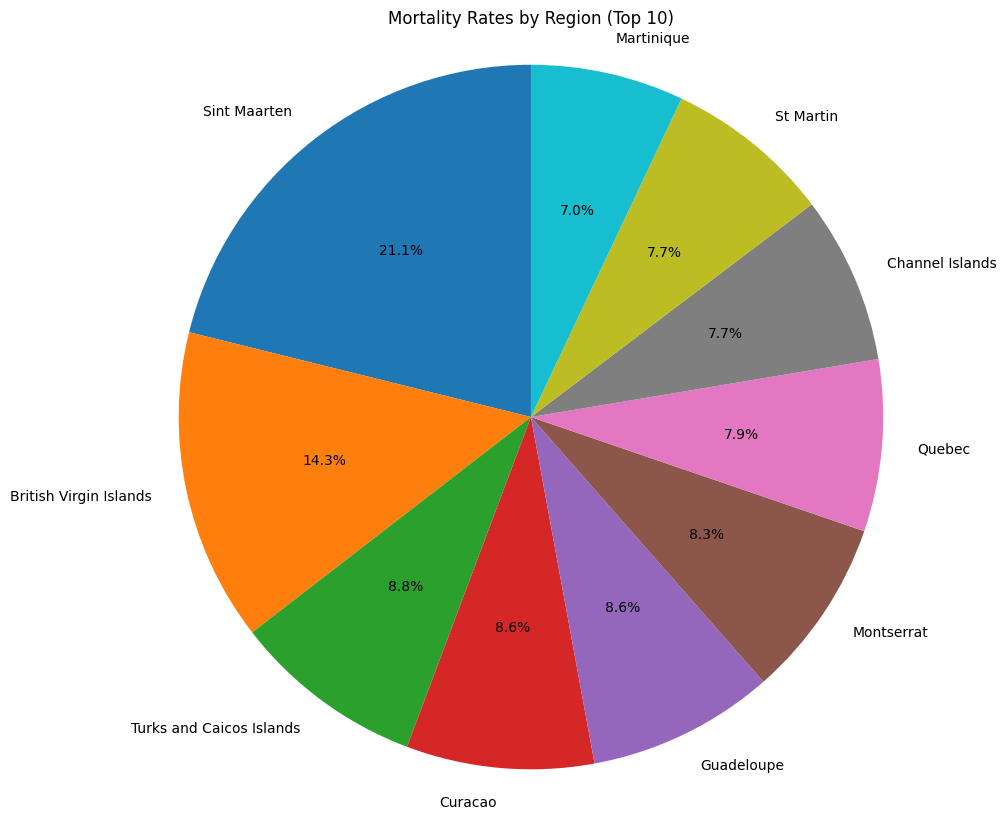

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'region_mortality' DataFrame is already created as in the previous code

# Create a pie chart of mortality rates by region
plt.figure(figsize=(10, 10))
plt.pie(region_mortality['Mortality_Rate'].head(10), labels=region_mortality['Province/State'].head(10), autopct='%1.1f%%', startangle=90)
plt.title('Mortality Rates by Region (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
